<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import os, string, random, time, math
from io import open
from sklearn.model_selection import train_test_split

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
from IPython.display import clear_output
sb.set()

In [0]:
languages = []
X = []
Y = []
data = []
with open('name2lang.txt', 'r') as file:
  for line in file:   # check this file for better understanding
    line = line.split(',')
    name = line[0].strip()
    lang = line[1].strip()
    data.append((name, lang))
    if not lang in languages:
      languages.append(lang)
    X.append(name)
    Y.append(lang)

n_languages = len(languages)

In [0]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [0]:
print(X_train)

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

In [0]:
all_letters = string.ascii_letters + ".,;'"
n_letters = len(all_letters)

In [0]:
print(all_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;'


In [0]:
def name_represent(name):
  oneHot_name = torch.zeros(len(name), 1, n_letters)
  for index, letter in enumerate(name):
    pos = all_letters.find(letter)
    oneHot_name[index][0][pos] = 1
  return oneHot_name

In [0]:
'''def lang_rep(lang):                          
  oh_lang = torch.zeros(n_languages, 1)
  pos = languages.index(lang)
  oh_lang[pos][0] = 1
  return oh_lang '''                    # function to just creaste position tensor & not one hot encode it :           
def lang_rep(lang):       
  return torch.tensor([languages.index(lang)], dtype = torch.long)

In [0]:
name_represent('Tzelobenok')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [0]:
lang_rep('Portuguese')

tensor([0])

##Data Visualization & Model

In [0]:
count = {}
for l in languages:
  occurances = Y.count(l)  # count number of times l is in Y.
  count[l] = occurances    # dictionary where index is language and no of times it occured in Y as value
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


[Text(0, 0, 'Portuguese'),
 Text(0, 0, 'Irish'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Vietnamese'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Greek'),
 Text(0, 0, 'Czech'),
 Text(0, 0, 'Dutch'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'French'),
 Text(0, 0, 'German'),
 Text(0, 0, 'Scottish'),
 Text(0, 0, 'English'),
 Text(0, 0, 'Russian'),
 Text(0, 0, 'Polish'),
 Text(0, 0, 'Arabic'),
 Text(0, 0, 'Korean'),
 Text(0, 0, 'Italian')]

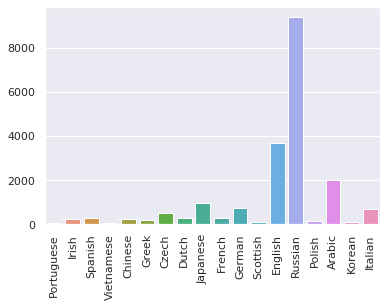

In [0]:
plt_ = sb.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation = 90)

In [0]:
class RNN_net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_net, self).__init__()
    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, input_, hidden):
    combined = torch.cat((input_, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def init_hidden(self):
    return torch.zeros(1, self.hidden_size)

In [0]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)

In [0]:
def inference(net, name):
  net.eval()
  name_ohe = name_represent(name)
  hidden = net.init_hidden()

  for i in range(name_ohe.size()[0]):
    output, hidden = net(name_ohe[i], hidden)
  return output

In [0]:
output = inference(net, 'Abashkin')
index = output.argmax()
print(output, index)

tensor([[-2.9529, -2.8543, -2.8982, -2.8676, -2.7933, -2.8966, -2.9391, -2.9201,
         -2.7893, -2.8851, -2.8952, -2.8672, -2.9195, -2.8231, -3.0179, -2.8471,
         -2.9653, -2.9249]], grad_fn=<LogSoftmaxBackward>) tensor(8)


In [0]:
def dataloader(n_points, X, Y):
  final_data = []
  for i in range(n_points):
    index = np.random.randint(len(X))
    name_, lang_ = X[index], Y[index]
    final_data.append((name_, lang_, name_represent(name_), lang_rep(lang_)))
  return final_data

In [0]:
def eval(net, n_points, k, X, Y):
  data = dataloader(n_points, X, Y)
  correct = 0
  for name, language,name_oh, lang_rep in data:

    output = inference(net, name)
    val, indices = output.topk(k)

    if lang_rep in indices:
      correct += 1

  accuracy = correct/n_points
  return accuracy

In [0]:
eval(net, 1000, 1, X_test, Y_test)

0.036

In [0]:
def train(net, opt, criterion, n_points):
  opt.zero_grad()
  total_loss = 0

  data = dataloader(n_points, X_train, Y_train)

  for name, lang, name_oh, lang_rep in data:
    hidden = net.init_hidden()

    for i in range(name_oh.size()[0]):
      output, hidden = net(name_oh[i], hidden)

    loss = criterion(output, lang_rep)
    loss.backward(retain_graph = True)

    total_loss += loss

  opt.step()
  return total_loss/n_points

In [0]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

In [0]:
%%time
train(net, opt, criterion, 200)

CPU times: user 250 ms, sys: 7.06 ms, total: 257 ms
Wall time: 261 ms


tensor(2.8680, grad_fn=<DivBackward0>)

In [0]:
eval(net, 1000, 1, X_test, Y_test)

0.492

In [0]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq = 5):
  criterion = nn.NLLLoss()
  opt = optim.SGD(net.parameters(), lr = lr, momentum=momentum)

  loss_arr = np.zeros(n_batches + 1)
  for i in range(n_batches):
    loss_arr[i+1] = (loss_arr[i] * i + train(net, opt, criterion, batch_size))/(i + 1)

    if i % display_freq == display_freq-1:
      clear_output(wait=True)

      print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, Y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, Y_test))
      plt.figure()
      plt.plot(loss_arr[1:i], '-*')
      plt.xlabel('Iteration')
      plt.ylabel('Loss')
      plt.show()
      print('\n\n')

Iteration 99 Top-1: 0.6795511221945137 Top-2: 0.7987531172069825


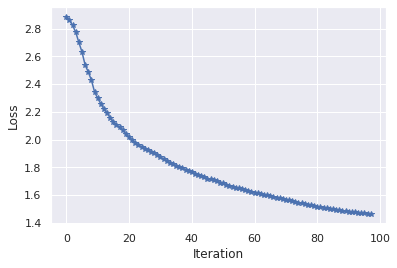

In [0]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr = 0.0005, n_batches = 100, batch_size = 256)

##LSTM Cell

In [0]:
class LSTM_net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTM_net, self).__init__()
    self.hidden_size = hidden_size
    self.lstm_cell = nn.LSTM(input_size, hidden_size)  # the internal nn classes require size in their inits when called & when called through objects
    self.h2o = nn.Linear(hidden_size, output_size)   # from forward func, we pass tensors as the internal func in nn classes after init require tensors
    self.SoftMax  =nn.LogSoftmax(dim = 2)

  def forward(self, input_, hidden):
    out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)  # -1 is to flatten out the input 
    output = self.h2o(hidden[0])
    output = self.SoftMax(output)
    return output.view(1, -1), hidden

  def init_hidden(self):   # a tuple because lstms require one hidden layer n one cell layer(for lstm operations) | lstm allows mutilayered networks.
    return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size)) #  (1 -> layers, 1 -> batch_size(x dim of vector), size of vector) 

Iteration 99 Top-1: 0.6566084788029926 Top-2: 0.7825436408977556


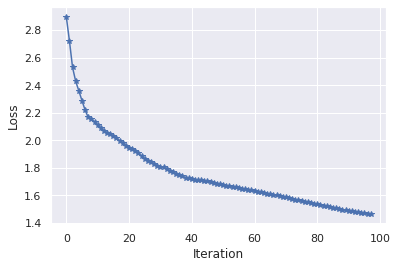

In [0]:
n_hidden = 128
lstm_net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(lstm_net, lr = 0.005, n_batches = 100, batch_size = 256)

## GRU Cell

In [0]:
class GRU_net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(GRU_net, self).__init__()
    self.hidden_size = hidden_size
    self.gru_cell = nn.GRU(input_size, hidden_size)
    self.h2o = nn.Linear(hidden_size, output_size)
    self.SoftMax = nn.LogSoftmax(dim = 2)

  def forward(self, input_, hidden):
    output, hidden = self.gru_cell(input_.view(1, 1, -1), hidden)
    output = self.h2o(hidden)
    output = self.SoftMax(output)
    return output.view(1, -1)

  def init_hidden(self):
    return torch.zeros(1, 1, self.hidden_size)

In [0]:
n_hidden = 128
gru_net = GRU_net(n_letters, n_hidden, n_languages)
train_setup(gru_net, lr = 0.0005, n_batches = 100, batch_size = 256)